In [15]:
import numpy as np
import pandas as pd
from visits import Visit, Cohort, rolling_autocorrelation
import glob
import pymannkendall as mk
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
import seaborn as sb


In [2]:
c1_contingency_values = pd.read_csv("contingency_table_c1.csv", sep=',')

In [4]:
c1_contingency_values["PPV"] = [x/(x+y) for x, y in zip(c1_contingency_values["TP"],c1_contingency_values["FP"])]

In [5]:
c1_contingency_values

,measure,TP,FP,FN,TN,sum,PPV
0,var_hr,21,228,91,1690,2030,0.084337
1,var_rr,23,155,77,1484,1739,0.129213
2,var_abf,21,153,45,1127,1346,0.120690
3,ac_hr,16,98,96,1820,2030,0.140351
4,ac_rr,10,81,89,1558,1738,0.109890
5,ac_abf,9,66,57,1214,1346,0.120000


In [6]:
c1_contingency_values["NPV"] = [x/(x+y) for x, y in zip(c1_contingency_values["TN"],c1_contingency_values["FN"])]

In [7]:
c1_contingency_values["Sensitivity"] = [x/(x+y) for x, y in zip(c1_contingency_values["TP"],c1_contingency_values["FN"])]

In [8]:
c1_contingency_values["Specificity"] = [x/(x+y) for x, y in zip(c1_contingency_values["TN"],c1_contingency_values["FP"])]

In [9]:
c1_contingency_values

,measure,TP,FP,FN,TN,sum,PPV,NPV,Sensitivity,Specificity
0,var_hr,21,228,91,1690,2030,0.084337,0.948905,0.187500,0.881126
1,var_rr,23,155,77,1484,1739,0.129213,0.950673,0.230000,0.905430
2,var_abf,21,153,45,1127,1346,0.120690,0.961604,0.318182,0.880469
3,ac_hr,16,98,96,1820,2030,0.140351,0.949896,0.142857,0.948905
4,ac_rr,10,81,89,1558,1738,0.109890,0.945962,0.101010,0.950580
5,ac_abf,9,66,57,1214,1346,0.120000,0.955153,0.136364,0.948438


In [12]:
c3_contingency_values = pd.read_csv("contingency_table_c3.csv", sep=',')
c3_contingency_values["PPV"] = [x/(x+y) for x, y in zip(c3_contingency_values["TP"],c3_contingency_values["FP"])]
c3_contingency_values["NPV"] = [x/(x+y) for x, y in zip(c3_contingency_values["TN"],c3_contingency_values["FN"])]
c3_contingency_values["Sensitivity"] = [x/(x+y) for x, y in zip(c3_contingency_values["TP"],c3_contingency_values["FN"])]
c3_contingency_values["Specificity"] = [x/(x+y) for x, y in zip(c3_contingency_values["TN"],c3_contingency_values["FP"])]
c3_contingency_values

,measure,TP,FP,FN,TN,sum,PPV,NPV,Sensitivity,Specificity
0,var_hr,16,228,99,1690,2033,0.065574,0.944662,0.139130,0.881126
1,var_rr,16,155,86,1484,1741,0.093567,0.945223,0.156863,0.905430
2,var_abf,11,153,57,1127,1348,0.067073,0.951858,0.161765,0.880469
3,ac_hr,15,98,101,1820,2034,0.132743,0.947423,0.129310,0.948905
4,ac_rr,7,81,98,1558,1744,0.079545,0.940821,0.066667,0.950580
5,ac_abf,6,66,61,1214,1347,0.083333,0.952157,0.089552,0.948438


In [14]:
c4_contingency_values = pd.read_csv("contingency_table_c4.csv", sep=',')
c4_contingency_values["PPV"] = [x/(x+y) for x, y in zip(c4_contingency_values["TP"],c4_contingency_values["FP"])]
c4_contingency_values["NPV"] = [x/(x+y) for x, y in zip(c4_contingency_values["TN"],c4_contingency_values["FN"])]
c4_contingency_values["Sensitivity"] = [x/(x+y) for x, y in zip(c4_contingency_values["TP"],c4_contingency_values["FN"])]
c4_contingency_values["Specificity"] = [x/(x+y) for x, y in zip(c4_contingency_values["TN"],c4_contingency_values["FP"])]
c4_contingency_values

,measure,TP,FP,FN,TN,sum,PPV,NPV,Sensitivity,Specificity
0,var_hr,2,228,9.0,1690,1929,0.008696,0.994703,0.181818,0.881126
1,var_rr,0,155,11.0,1484,1650,0.000000,0.992642,0.000000,0.905430
2,var_abf,3,153,6.0,1127,1289,0.019231,0.994704,0.333333,0.880469
3,ac_hr,2,98,9.0,1820,1929,0.020000,0.995079,0.181818,0.948905
4,ac_rr,5,81,6.0,1558,1650,0.058140,0.996164,0.454545,0.950580
5,ac_abf,5,66,4.0,1214,1289,0.070423,0.996716,0.555556,0.948438


In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(33, 22), sharex=True, sharey=True)

plt.rcParams['font.size'] = '30'
rc('font', weight='bold')

In [33]:
c1_confusion = [np.array([[c1_contingency_values["TP"][x],c1_contingency_values["FP"][x]], [c1_contingency_values["FN"][x], c1_contingency_values["TN"][x]]]) for x in range(6)]

In [34]:
c1_confusion

[array([[  21,  228],
        [  91, 1690]]),
 array([[  23,  155],
        [  77, 1484]]),
 array([[  21,  153],
        [  45, 1127]]),
 array([[  16,   98],
        [  96, 1820]]),
 array([[  10,   81],
        [  89, 1558]]),
 array([[   9,   66],
        [  57, 1214]])]

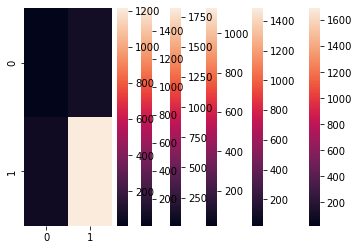

In [35]:
for m in c1_confusion:
    sb.heatmap(m)